# BASIC

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Sets a random seed to ensure reproducible results

In [5]:
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
"""
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)"
"""

'\nfrom keras import backend as K\nsession_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)\nsess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)\ntf.compat.v1.keras.backend.set_session(sess)"\n'

In [6]:
X_train = pd.read_csv("../Data/X_train_final.csv")
y_train = pd.read_csv("../Data/y_train_final.csv")
X_test = pd.read_csv("../Data/X_test_final.csv")
y_test = pd.read_csv("../Data/y_test_final.csv")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(572, 57)
(106, 57)
(572, 1)
(106, 1)


,Age (yrs),BMI,Pulse rate(bpm),Menstrual Cycle Length(days),Marriage Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH/LH,...,Vit D3 (ng/mL)_high,Vit D3 (ng/mL)_low,Vit D3 (ng/mL)_normal,PRG(ng/mL)_low,RBS(mg/dl)_high,RBS(mg/dl)_normal,I beta-HCG cat_abnormal,I beta-HCG cat_normal,II beta-HCG cat_abnormal,II beta-HCG cat_normal
0,1.212838,1.138042,1.784158,-1.974369,1.714235,1,1.032154,-0.155302,-0.062256,-0.052340,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.212838,-0.738207,-0.519094,0.007810,1.303924,0,-0.413545,-0.194309,-0.147713,-0.059495,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.670140,-0.713840,-0.519094,0.668536,1.098769,1,-0.413545,0.542465,0.300274,-0.095708,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.415256,-1.152443,2.551909,0.007810,-1.157939,1,-0.413545,2.727182,-0.076965,-0.067672,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.031939,1.138042,2.551909,0.007810,1.303924,0,-0.413545,-0.194309,-0.147713,-0.072053,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,-1.191281,0.794340,1.784158,0.007810,-0.835833,1,-0.413545,-0.194309,-0.147713,0.020348,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
568,-1.558498,0.054061,0.248657,-1.845955,-0.853103,0,-0.413545,-0.194309,-0.147713,-0.060024,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
569,-0.665800,-0.164731,2.375315,-1.211244,-0.542473,0,-0.413545,-0.143145,-0.035624,-0.096597,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
570,0.319137,2.212497,1.784158,1.329262,-0.323034,1,-0.413545,-0.058615,-0.137401,-0.043433,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [7]:
# Define and train Gaussian Process Classifier with RBF kernel
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train, y_train)

c:\Users\Stacy\anaconda\envs\dsa4262_pcos\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)

In [8]:
# Predict on the test set
y_pred = gpc.predict(X_test)
y_prob = gpc.predict_proba(X_test)[:, 1]  # Probability estimates for AUC-ROC

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')
print('Classification Report:\n', report)

Accuracy: 0.8679
Precision: 0.7500
Recall: 0.8824
F1 Score: 0.8108
AUC-ROC: 0.9681
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90        72
           1       0.75      0.88      0.81        34

    accuracy                           0.87       106
   macro avg       0.84      0.87      0.85       106
weighted avg       0.88      0.87      0.87       106



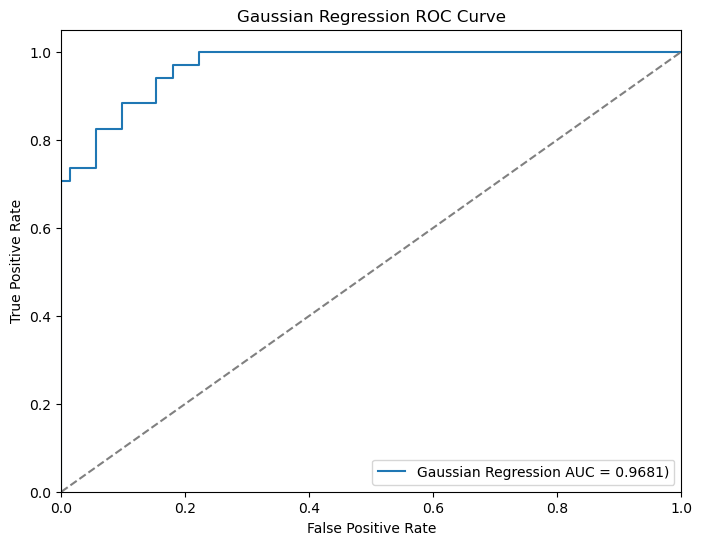

In [10]:
# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gaussian Regression AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# GridSearch, Using new threshold

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectKBest, f_classif


In [12]:
# Hyperparameter tuning for length_scale
# Hyperparameter tuning for different kernels
param_grid = {
    'kernel': [
        1.0 * RBF(length_scale=l) for l in [0.025, 0.05, 0.08, 0.1, 0.5]
    ] + [
        1.0 * Matern(length_scale=l, nu=1.5) for l in [0.025, 0.05, 0.08, 0.1, 0.5]
    ] + [
        1.0 * RationalQuadratic(length_scale=l, alpha=1.0) for l in [0.025, 0.05, 0.08, 0.1, 0.5]
    ]
}

gpc = GridSearchCV(GaussianProcessClassifier(random_state=42, warm_start=True), 
                   param_grid, 
                   cv=5, 
                   scoring='roc_auc')

# Use the scaled training set
gpc.fit(X_train, y_train)

# Best model selection
gpc_best = gpc.best_estimator_

# Use the scaled test set
y_pred = gpc_best.predict(X_test)
y_prob = gpc_best.predict_proba(X_test)[:, 1]  # Probability estimates for AUC-ROC


c:\Users\Stacy\anaconda\envs\dsa4262_pcos\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Stacy\anaconda\envs\dsa4262_pcos\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Stacy\anaconda\envs\dsa4262_pcos\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Stacy\anaconda\envs\dsa4262_pcos\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when 

In [13]:
from sklearn.metrics import confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # aka Sensitivity / True Positive Rate
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
report = classification_report(y_test, y_pred)

# Compute confusion matrix for specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Print results
print(f'Best Kernel: {gpc.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')
print('Classification Report:\n', report)

Best Kernel: {'kernel': 1**2 * RationalQuadratic(alpha=1, length_scale=0.025)}
Accuracy: 0.8585
Precision: 0.7317
Recall (Sensitivity): 0.8824
Specificity: 0.8472
F1 Score: 0.8000
AUC-ROC: 0.9641
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        72
           1       0.73      0.88      0.80        34

    accuracy                           0.86       106
   macro avg       0.84      0.86      0.85       106
weighted avg       0.87      0.86      0.86       106



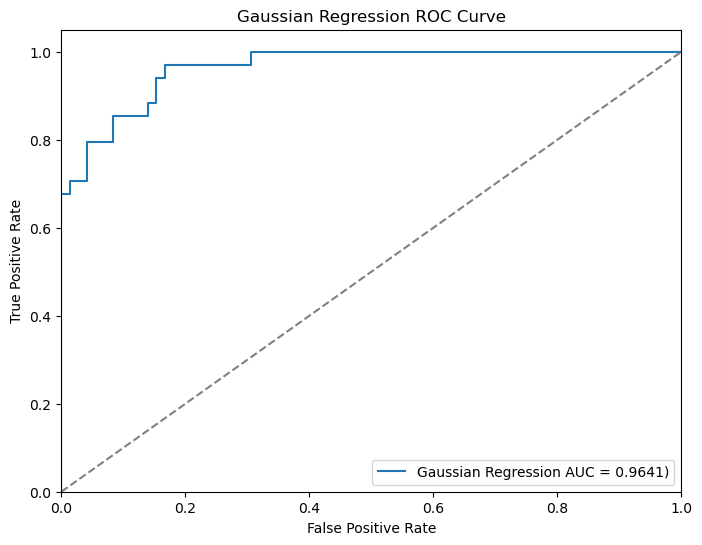

In [14]:
# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gaussian Regression AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Finding the best threshold

In [15]:
# This method minimizes the distance to the top-left corner of the ROC space.
from sklearn.metrics import roc_curve

# Compute FPR, TPR, and thresholds from predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate Euclidean distance to the top-left corner (0,1)
distances = np.sqrt((1 - tpr)**2 + fpr**2)

# Find index of the smallest distance
best_index = np.argmin(distances)

# Retrieve the best threshold
best_thresh = thresholds[best_index]

print(f"Best threshold: {best_thresh:.4f}")

Best threshold: 0.4925


In [16]:
# Predict using the best threshold
y_pred_best = (y_prob >= best_thresh).astype(int)

# Evaluate using the new threshold
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        72
           1       0.74      0.94      0.83        34

    accuracy                           0.88       106
   macro avg       0.86      0.89      0.87       106
weighted avg       0.90      0.88      0.88       106



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Evaluate using the best threshold
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
auc_roc_best = roc_auc_score(y_test, y_prob)  # stays the same, based on y_prob

# Confusion matrix to compute specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best).ravel()
specificity_best = tn / (tn + fp)

# Classification report
report_best = classification_report(y_test, y_pred_best)

# Print results
print(f"\n--- Evaluation at Best Threshold ({best_thresh:.4f}) ---")
print(f'Accuracy: {accuracy_best:.4f}')
print(f'Precision: {precision_best:.4f}')
print(f'Recall (Sensitivity): {recall_best:.4f}')
print(f'Specificity: {specificity_best:.4f}')
print(f'F1 Score: {f1_best:.4f}')
print(f'AUC-ROC: {auc_roc_best:.4f}')
print('Classification Report:\n', report_best)


--- Evaluation at Best Threshold (0.4925) ---
Accuracy: 0.8774
Precision: 0.7442
Recall (Sensitivity): 0.9412
Specificity: 0.8472
F1 Score: 0.8312
AUC-ROC: 0.9641
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90        72
           1       0.74      0.94      0.83        34

    accuracy                           0.88       106
   macro avg       0.86      0.89      0.87       106
weighted avg       0.90      0.88      0.88       106



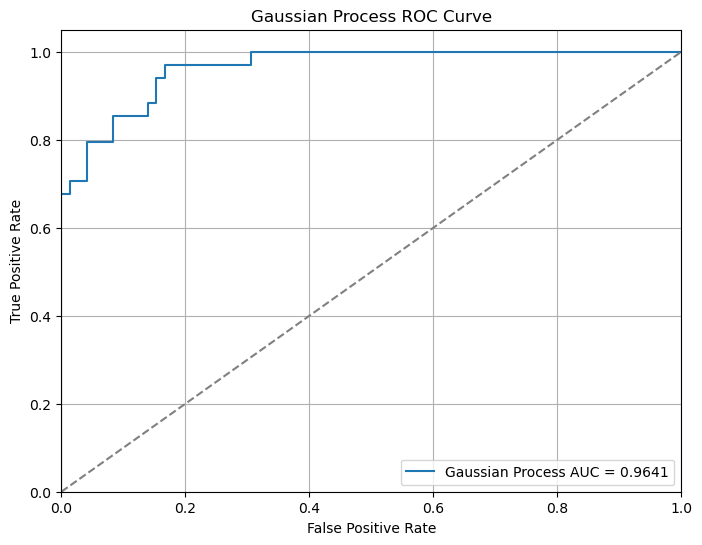

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assume fpr, tpr, y_test, and y_prob are already defined
# auc_roc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gaussian Process AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Process ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
